## Project Overview

This project is structured to provide hands-on experience in implementing a RAG system. Students will work through stages from dataset selection to connection to external artefacts (VectorDB, APIs), gaining a comprehensive understanding of RAG’s components and their integration.

### 1. Dataset Selection

Select a dataset suitable for your RAG application. Possible options include:
- **Learning Material**: A collection of books, slide decks on a specific topic
- **News articles**: A dataset containing articles on various topics.
- **Product Reviews**: Reviews of products along with follow-up responses.

**Bonus:** Consider using Multimodal datasets like text+images or text+audio

Check the end of this file for dataset examples

### 2. Exploratory Data Analysis (EDA)
Perform an EDA on the chosen dataset to understand its structure, content, and the challenges it presents. Document your findings and initial thoughts on how the data can be leveraged in a RAG system.

### 3. Embedding and Storing Chunks

#### 3.A Embed Your Chunks of Documents
- **Objective**: Transform your chunks of documents into embeddings that can be stored in a VectorDB.
- **Suggested Tool**: [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) (for English content).

**Bonus** Consider using the Embedding model from OpenAI, just be attentive to costs.

#### 3.B Connection to Vector DB
- **Objective**: Connect to a vector database to store and retrieve document embeddings.
- **Suggested Tool**: [ChromaDB](https://www.trychroma.com/).
- **Steps**:
  1. Pre-process the dataset to generate embeddings for each document using a suitable model (e.g., Sentence Transformers).
  2. Store these embeddings in ChromaDB.
  3. Implement retrieval logic to fetch relevant documents based on a query.

**Bonus:** Consider using a Cloud service to store your embeddings like Azure AI Search or Weaviate. Be attentive to potential costs.

#### 3.C AI Frameworks
- **Consider Using**: Frameworks like [LangChain](https://python.langchain.com/docs/integrations/vectorstores/chroma) and [LlamaIndex](https://gpt-index.readthedocs.io/en/latest/examples/vector_stores/ChromaIndexDemo.html) for easier integration.

### 4. Connecting to LLM
- **Objective**: Connect to a Large Language Model to generate responses based on retrieved documents.
- **Suggested Tool**: [OpenAI API](https://platform.openai.com/docs/api-reference/introduction).
- **Steps**:
  1. Set up access to the OpenAI API or an alternative LLM API.
  2. Develop the logic to combine retrieved documents with the query to generate a response.
  3. Implement and test the end-to-end RAG pipeline.

- **Bonus**: Connect to an API through a cloud service like AzureOpenAI, AWS Bedrock, or Google Vertex AI. Please note that the setup for this will be much more complex and not all might have a free tier model.

### 5. Evaluation
- **Objective**: Evaluate the performance of your RAG system in two ways.
  1. **Yourself**: Test the system multiple times to understand its performance and usability.
  2. **LLM as a judge (Bonus)**: Use an LLM as a judge to generate questions and evaluate your RAG's answers.
- **Steps**:
  1. Create a test set of queries and expected responses.
  2. Measure the performance of your RAG system against these queries.
  3. Analyze and document the strengths and weaknesses of your system.

### 6. Deployment (Bonus)
- **Objective**: Deploy the RAG system as a web application or API.
- **Tools**: Use frameworks like Flask or FastAPI for the backend and Streamlit for the frontend.
- **Steps**:
  1. Develop a simple web interface to interact with your RAG system.
  2. Deploy the application on a cloud platform such as AWS, GCP, or Heroku.


# EDA

In [8]:
import os

data_dir = "elmundo_chunked_en_page1_15years" 
files = os.listdir(data_dir)

print(f"Total files: {len(files)}")
print("Sample files:", files[:5])  # Preview first 5 files


Total files: 821
Sample files: ['19200103_1.txt', '19200110_1.txt', '19200117_1.txt', '19200124_1.txt', '19200131_1.txt']


### File size check

In [11]:
file_sizes = {file: os.path.getsize(os.path.join(data_dir, file)) for file in files}
print(f"Average file size: {sum(file_sizes.values()) / len(file_sizes):.2f} bytes")
print("Smallest files:", sorted(file_sizes.items(), key=lambda x: x[1])[:5])
print("Largest files:", sorted(file_sizes.items(), key=lambda x: x[1], reverse=True)[:5])

Average file size: 19882.52 bytes
Smallest files: [('19280901_1.txt', 6519), ('19280512_1.txt', 7693), ('19290202_1.txt', 8173), ('19281222_1.txt', 8391), ('19280602_1.txt', 8399)]
Largest files: [('19471206_1.txt', 33904), ('19470802_1.txt', 33606), ('19471004_1.txt', 33317), ('19461221_1.txt', 32961), ('19470419_1.txt', 32633)]


### Sampling Data

In [14]:
def read_text_file(file_path, num_lines=15):
    with open(file_path, "r", encoding="utf-8") as f:
        return "\n".join([next(f) for _ in range(num_lines)])

sample_file = os.path.join(data_dir, files[0])
print(f"Contents of {files[0]}:\n", read_text_file(sample_file))

Contents of 19200103_1.txt:
 ELWNDO

8 pages 3 ctvs. Semester, $4.00 One year, $7.50

Offices: Salvador Brau. 81 Tel. 833 P. O. Box 345

NEWSPAPER OF THE TANGLE.

EXCEPT SUNDAYS

AKOU "S^=2==E======== == ^= ^z =====i======= ^ ======

SAN JUAN, PUERTO RICO. - 71 i. 1- ■- ■- r- - _¡

SATURDAY, JANUARY 3, 1920. r

i NUMBER 271.

ENTERED AS SECOND CLASS MATTER, FEBRUARY 21, 1919. AT THE POST OFFICE AT SAN JEAN. PORTO RICO. UNDER THE ACT OF MARCH 3, 1879.

Plot to assassinate the Prince of Serbia. 192,000 tons in dykes to be delivered by the Germans.

Peace already signed, the American site Hadarai in France.

! Excursion, banquet and ball in honor of the Congressmen.

A great fire ravages ios barracks at Nantes '>< filed with Che Port-J a-ter a* f-an Juan. P R. cn Jan. 2nd Mis, । . íoimwmg cablearas requtrZl t,.t Sts P. I I I 2 B P L 4 Beg. 1911, (P?r French Cable) v .^ ¡ NANTES. 2.- A most violent n ash, which could not be quenched with !The French government had recently acquired the can

### Text Length

In [17]:
import numpy as np

file_lengths = []

for file in files:
    with open(os.path.join(data_dir, file), "r", encoding="utf-8") as f:
        text = f.read()
        file_lengths.append(len(text.split()))  # Count words

print(f"Average words per file: {np.mean(file_lengths):.2f}")
print(f"Min words: {np.min(file_lengths)}, Max words: {np.max(file_lengths)}")

Average words per file: 3394.37
Min words: 1323, Max words: 5739


### Token and Vocabulary analysis

In [20]:
from collections import Counter

word_counts = Counter()

for file in files[:100]:  # Limit to first 100 files for performance
    with open(os.path.join(data_dir, file), "r", encoding="utf-8") as f:
        text = f.read().lower().split()
        word_counts.update(text)

print("Most common words:", word_counts.most_common(10))

Most common words: [('the', 24692), ('of', 13083), ('to', 7748), ('and', 6976), ('in', 6303), ('a', 4177), ('that', 3771), ('i', 3174), ('for', 2470), ('is', 2327)]


### Plot words

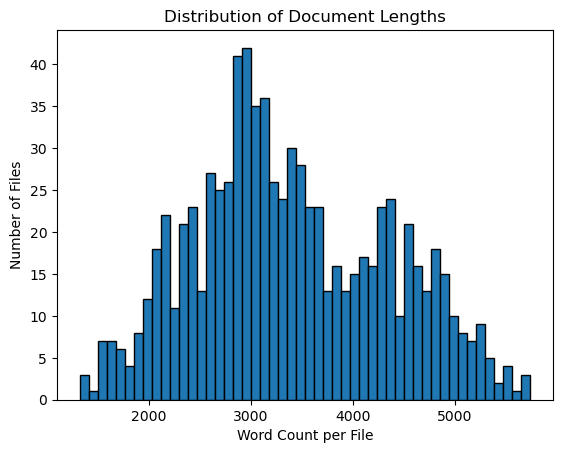

In [23]:
import matplotlib.pyplot as plt

plt.hist(file_lengths, bins=50, edgecolor="black")
plt.xlabel("Word Count per File")
plt.ylabel("Number of Files")
plt.title("Distribution of Document Lengths")
plt.show()

# 2. Embedding

In [26]:
from sentence_transformers import SentenceTransformer

# Load the embedding model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [28]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Define the directory containing text files
data_dir = "elmundo_chunked_en_page1_15years"

# Read all text files and store content
documents = []
for file in os.listdir(data_dir):
    if file.endswith(".txt"):  # Ensure we only read text files
        with open(os.path.join(data_dir, file), "r", encoding="utf-8") as f:
            documents.append(f.read())

# Split documents into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = text_splitter.create_documents(documents)

print(f"Total Chunks: {len(chunks)}")

Total Chunks: 43445


In [30]:
import numpy as np

batch_size = 256  # Adjust based on your system's memory
embeddings = []
count = 0
for i in range(0, len(chunks), batch_size):
    batch = [chunk.page_content for chunk in chunks[i:i+batch_size]]
    batch_embeddings = model.encode(batch)  # Encode batch at once
    embeddings.extend(batch_embeddings)
    count += 1 
    print(f'Batch #: {count} complete.')

print("Embedding complete!")

Batch #: 1 complete.
Batch #: 2 complete.
Batch #: 3 complete.
Batch #: 4 complete.
Batch #: 5 complete.
Batch #: 6 complete.
Batch #: 7 complete.
Batch #: 8 complete.
Batch #: 9 complete.
Batch #: 10 complete.
Batch #: 11 complete.
Batch #: 12 complete.
Batch #: 13 complete.
Batch #: 14 complete.
Batch #: 15 complete.
Batch #: 16 complete.
Batch #: 17 complete.
Batch #: 18 complete.
Batch #: 19 complete.
Batch #: 20 complete.
Batch #: 21 complete.
Batch #: 22 complete.
Batch #: 23 complete.
Batch #: 24 complete.
Batch #: 25 complete.
Batch #: 26 complete.
Batch #: 27 complete.
Batch #: 28 complete.
Batch #: 29 complete.
Batch #: 30 complete.
Batch #: 31 complete.
Batch #: 32 complete.
Batch #: 33 complete.
Batch #: 34 complete.
Batch #: 35 complete.
Batch #: 36 complete.
Batch #: 37 complete.
Batch #: 38 complete.
Batch #: 39 complete.
Batch #: 40 complete.
Batch #: 41 complete.
Batch #: 42 complete.
Batch #: 43 complete.
Batch #: 44 complete.
Batch #: 45 complete.
Batch #: 46 complet

# Vectors

In [32]:
import chromadb

# Initialize ChromaDB
chroma_client = chromadb.PersistentClient(path="./chroma_db")

# Create or get a collection
collection = chroma_client.get_or_create_collection(name="rag_documents")

# Ensure data consistency
assert len(chunks) == len(embeddings), "Mismatch between chunks and embeddings!"

# Define batch size (adjust based on limit)
MAX_BATCH_SIZE = 40_000  

# Split data into batches
for i in range(0, len(chunks), MAX_BATCH_SIZE):
    batch_ids = [f"chunk_{j}" for j in range(i, min(i + MAX_BATCH_SIZE, len(chunks)))]
    batch_docs = [chunk.page_content for chunk in chunks[i:i + MAX_BATCH_SIZE]]
    batch_embs = [embedding.tolist() for embedding in embeddings[i:i + MAX_BATCH_SIZE]]

    # Insert batch into ChromaDB
    collection.add(ids=batch_ids, documents=batch_docs, embeddings=batch_embs)

    print(f"✅ Stored batch {i // MAX_BATCH_SIZE + 1} with {len(batch_ids)} embeddings.")

print(f"Successfully stored {len(chunks)} embeddings in ChromaDB.")

✅ Stored batch 1 with 40000 embeddings.
✅ Stored batch 2 with 3445 embeddings.
Successfully stored 43445 embeddings in ChromaDB.


# Retrieval based on query

In [34]:
# Function to generate query embeddings
def get_query_embedding(query):
    """Generates the embedding for the query text."""
    return model.encode([query])[0]  # 'encode' expects a list, so we wrap query in a list

# Query the collection for relevant documents
query = "France"
query_embedding = get_query_embedding(query)  # Generate embedding for the query

# Search for the most similar documents in ChromaDB
results = collection.query(query_embeddings=[query_embedding.tolist()], n_results=5)

# Display the results
for result in results['documents']:
    print(result)

['Alliance between France and Great Britain', 'who will lead France along the paths of order and freedom.', 'PARIS, May 20.-The situation between the governments of France and England is becoming more and more tense. The latest events highlight the domination exercised by the English with their diplomacy abroad, as well as their eternal predominance in European politics. Not yet satisfied with their security protected by the ocean, they now request the evacuation of Dusseldorf, Ruhrort, Duisbourg, and more than all that, the abolition of the customs cordon imposed by the French Republic on Germany.', '(By Cabio French) i PARIS, April 23.-A representative i of the newspaper "Le Matin** at the San Remo coni\' ferences ba been able to ente \' rse of a plan conceived by the je| fes of the governments of Ingla\'^errr. and i Italy. XJoyd George and Uitti, for the purpose of having Germany invited to take part in the sessions held there. This news has caused a deep sensation in Europe and gre

# Connect to LLM

In [4]:
import openai
# Read OpenAI API key from file
with open("API_Key.txt", "r") as file:
    openai_api_key = file.read().strip()  # Remove extra spaces/newlines

In [6]:
def combine_query_with_documents(query, documents):
    """Combine the query with retrieved documents to prepare a prompt."""
    prompt = f"Question: {query}\n\n"
    prompt += "Relevant Documents:\n"
    for idx, doc in enumerate(documents):
        prompt += f"{idx + 1}. {doc}\n"
    prompt += "\nAnswer the question based on the above documents."
    return prompt

In [8]:
def generate_response_from_openai(prompt):
    """Generate a response from OpenAI using the combined query and documents."""
    response = openai.Completion.create(
        model="gpt-3.5-turbo",  # You can use "gpt-4" or another model if desired
        prompt=prompt,
        max_tokens=200,  # Adjust based on the desired response length
        temperature=0.7,  # Controls creativity, between 0 and 1
        n=1  # Number of responses to generate
    )
    return response.choices[0].text.strip()

In [10]:
# Function to integrate everything: retrieval + query + LLM response
def run_rag_pipeline(query):
    # 1. Retrieve relevant documents from ChromaDB
    query_embedding = get_query_embedding(query)
    results = collection.query(query_embeddings=[query_embedding.tolist()], n_results=5)
    retrieved_documents = results['documents']
    
    # 2. Combine the query with retrieved documents
    prompt = combine_query_with_documents(query, retrieved_documents)
    
    # 3. Generate response from OpenAI LLM
    response = generate_response_from_openai(prompt)
    
    return response

# Example query
query = "Why is France so influential in 1919?"
response = run_rag_pipeline(query)
print("Generated Response:", response)

NameError: name 'get_query_embedding' is not defined